# Examples of hypergraph and simplicial complexes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from hypergraphs_arsham import *

In [2]:
def compute_laplacians(hyperedges) : 
    """Compute the Laplacian up to order 2 and the multiorder Laplacian. 
    
    If the highest order is larger than 2 (triangles), modify the function accordingly.
    
    """
    L1, K1 = laplacian_of_order(d=1, N=N, hyperedges=hyperedges, return_k=True)
    L2, K2 = laplacian_of_order(d=2, N=N, hyperedges=hyperedges, return_k=True)

    gamma_1 = 1
    gamma_2 = 1

    # multiorder Laplacian
    L12 = (gamma_1 / np.mean(K1)) * L1 + (gamma_2 / np.mean(K2)) * L2 #+ (gamma_3 / np.mean(K3)) * L3
    
    return L1, L2, L12

def compute_eigenvalues(hyperedges) :
    """Compute corresponding Lyapunov exponents.
    
    If the highest order is larger than 2 (triangles), modify the function accordingly.
    
    """

    L1, K1 = laplacian_of_order(d=1, N=N, hyperedges=hyperedges, return_k=True)
    L2, K2 = laplacian_of_order(d=2, N=N, hyperedges=hyperedges, return_k=True)

    gamma_1 = 1
    gamma_2 = 1

    # multiorder Laplacian
    L12 = (gamma_1 / np.mean(K1)) * L1 + (gamma_2 / np.mean(K2)) * L2 #+ (gamma_3 / np.mean(K3)) * L3

    eival_1, _ = np.linalg.eig(L1)
    eival_2, _ = np.linalg.eig(L2)

    eival_12, _ = np.linalg.eig(L12)

    lyap_1 = - (gamma_1 / np.mean(K1)) * eival_1
    lyap_2 = - (gamma_2 / np.mean(K2)) * eival_2

    # Multiorder Lyapunov exponents
    lyap_12 = - eival_12

    return lyap_1, lyap_2, lyap_12

## 1. Fully connected

In [3]:
N = 5
d_max = 2

# generate hyperedges 
hyperedges_fully = fully_connected_hypergraph(N, d_max)

# compute eigenvalues 
L1, L2, L12 = compute_laplacians(hyperedges_fully) # L12 is the multiorder one
lyap_1, lyap_2, lyap_12 = compute_eigenvalues(hyperedges_fully)

In [5]:
laplacian_of_order(d=1, N=N, hyperedges=hyperedges_fully, return_k=False)

array([[ 4., -1., -1., -1., -1.],
       [-1.,  4., -1., -1., -1.],
       [-1., -1.,  4., -1., -1.],
       [-1., -1., -1.,  4., -1.],
       [-1., -1., -1., -1.,  4.]])

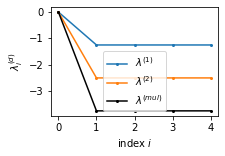

In [4]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(np.sort(lyap_1)[::-1], 'o-', ms=2, label=r'$\lambda^{(1)}$')
ax.plot(np.sort(lyap_2)[::-1], 'o-', ms=2,  label=r'$\lambda^{(2)}$')

lyap_s = np.sort(lyap_12)[::-1]
ax.plot(lyap_s, 'o-', c="black", ms=2, label=r'$\lambda^{(mul)}$')


ax.legend()
# ax.set_title(fr"N={N}, k1={k1}, k2={k2}") #s, $\lambda^{{tot}}_2$={lyap_s[1]:.2f}, $\lambda^{{tot}}_N$={lyap_s[-1]:.2f}")
ax.set_ylabel(r"$\lambda^{(d)}_i$") #Lyapunov exponents 
ax.set_xlabel(r"index $i$")

# plt.savefig(f"random_iac__N_{N}_p1_{p1}_p2_{p2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")
# plt.savefig(f"random_iac__N_{N}_k1_{k1}_k2_{k2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")

plt.show()

## 2. Random hypergraph 

In [10]:
N = 10
ps = [0.5, 0.1]

# generate hyperedges 
hyperedges_random = random_hypergraph(N, ps)
# print(hyperedges)

# compute eigenvalues 
L1, L2, L12 = compute_laplacians(hyperedges_random) # L12 is the multiorder one
lyap_1, lyap_2, lyap_12 = compute_eigenvalues(hyperedges_random)

In [14]:
laplacian_of_order(d=2, N=N, hyperedges=hyperedges_random, return_k=False)

array([[18., -2., -3., -3.,  0., -2., -3., -2., -2., -1.],
       [-2., 12.,  0., -3.,  0., -1., -3.,  0., -2., -1.],
       [-3.,  0.,  6.,  0.,  0.,  0., -1.,  0., -1., -1.],
       [-3., -3.,  0., 12.,  0., -2., -1.,  0., -3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-2., -1.,  0., -2.,  0., 10., -1., -1., -2., -1.],
       [-3., -3., -1., -1.,  0., -1., 12., -1., -2.,  0.],
       [-2.,  0.,  0.,  0.,  0., -1., -1.,  4.,  0.,  0.],
       [-2., -2., -1., -3.,  0., -2., -2.,  0., 12.,  0.],
       [-1., -1., -1.,  0.,  0., -1.,  0.,  0.,  0.,  4.]])

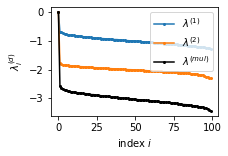

In [6]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(np.sort(lyap_1)[::-1], 'o-', ms=2, label=r'$\lambda^{(1)}$')
ax.plot(np.sort(lyap_2)[::-1], 'o-', ms=2,  label=r'$\lambda^{(2)}$')

lyap_s = np.sort(lyap_12)[::-1]
ax.plot(lyap_s, 'o-', c="black", ms=2, label=r'$\lambda^{(mul)}$')


ax.legend()
# ax.set_title(fr"N={N}, k1={k1}, k2={k2}") #s, $\lambda^{{tot}}_2$={lyap_s[1]:.2f}, $\lambda^{{tot}}_N$={lyap_s[-1]:.2f}")
ax.set_ylabel(r"$\lambda^{(d)}_i$") #Lyapunov exponents 
ax.set_xlabel(r"index $i$")

# plt.savefig(f"random_iac__N_{N}_p1_{p1}_p2_{p2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")
# plt.savefig(f"random_iac__N_{N}_k1_{k1}_k2_{k2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")

plt.show()

## 3. Random hypergraph completed (simplicial complex)

In [7]:
# generate simplicial complex by completing hypergraph
# might be slow for large networks
hyperedges_random_completed = to_simplicial_complex_from_hypergraph(hyperedges_random, verbose=False)

In [8]:
# compute eigenvalues 
L1, L2, L12 = compute_laplacians(hyperedges_random_completed) # L12 is the multiorder one
lyap_1, lyap_2, lyap_12 = compute_eigenvalues(hyperedges_random_completed)

/home/maxime/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


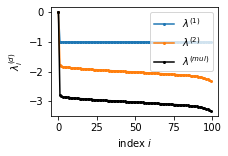

In [9]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(np.sort(lyap_1)[::-1], 'o-', ms=2, label=r'$\lambda^{(1)}$')
ax.plot(np.sort(lyap_2)[::-1], 'o-', ms=2,  label=r'$\lambda^{(2)}$')

lyap_s = np.sort(lyap_12)[::-1]
ax.plot(lyap_s, 'o-', c="black", ms=2, label=r'$\lambda^{(mul)}$')


ax.legend()
# ax.set_title(fr"N={N}, k1={k1}, k2={k2}") #s, $\lambda^{{tot}}_2$={lyap_s[1]:.2f}, $\lambda^{{tot}}_N$={lyap_s[-1]:.2f}")
ax.set_ylabel(r"$\lambda^{(d)}_i$") #Lyapunov exponents 
ax.set_xlabel(r"index $i$")

# plt.savefig(f"random_iac__N_{N}_p1_{p1}_p2_{p2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")
# plt.savefig(f"random_iac__N_{N}_k1_{k1}_k2_{k2}_spectrum_g1_{gamma_1:+}_g2_{gamma_2:+}_normed.png", dpi=300, bbox_inches="tight")

plt.show()

In [10]:
M_2 = adj_tensor_of_order(d=2, N=N, hyperedges=hyperedges_random_completed)
M_2

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [16]:
adj_2 = adj_matrix_of_order(d=2, M=M_2)
adj_2

array([[ 0.,  9., 10., ...,  6.,  7., 12.],
       [ 9.,  0.,  9., ..., 10.,  6.,  9.],
       [10.,  9.,  0., ..., 10.,  9., 11.],
       ...,
       [ 6., 10., 10., ...,  0.,  7.,  6.],
       [ 7.,  6.,  9., ...,  7.,  0., 10.],
       [12.,  9., 11., ...,  6., 10.,  0.]])

## test review manuscript 

In [22]:
hyperedges = [(1, 2, 3),
            (1, 2, 6),
            (1, 4, 5),
            (1, 5, 6),
            (2, 3, 4),
            (3, 4, 5),
            (3, 4, 6),
            (4, 5, 6)]

L2, K2 = laplacian_of_order(d=2, N=7, hyperedges=hyperedges, return_k=True)
L2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  8., -2., -1., -1., -2., -2.],
       [ 0., -2.,  6., -2., -1.,  0., -1.],
       [ 0., -1., -2.,  8., -3., -1., -1.],
       [ 0., -1., -1., -3., 10., -3., -2.],
       [ 0., -2.,  0., -1., -3.,  8., -2.],
       [ 0., -2., -1., -1., -2., -2.,  8.]])

In [26]:
# compute eigenvalues 
gamma_2 = 1
eival_2, _ = np.linalg.eig(L2)
lyap_2 = - (gamma_2 / np.mean(K2)) * eival_2

In [29]:
eival_2

array([ 0.        , 13.11131232,  6.17108754,  8.16781512, 10.        ,
       10.54978502,  0.        ])